In [1]:
import pandas as pd
import requests
import zipfile
import io, os
import openpyxl
from pathlib import Path
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn

In [2]:
import sys
print(sys.executable)
import seaborn as sns
import plotly.graph_objects as go
sys.path.append(".")
import visualizations

import importlib
importlib.reload(visualizations)


d:\Desktop\zaawansowane_techniki_programowania_bioinf\projekt3\Maly_projekt_3\venv\Scripts\python.exe


<module 'visualizations' from 'd:\\Desktop\\zaawansowane_techniki_programowania_bioinf\\projekt3\\projekt_drugiej_grupy\\projekt3\\src\\visualizations.py'>

## Podział pracy:
* zad 2 i 3: Maja Domańska
* zad 1 i 4: Joanna Huba

## wczytanie danych

In [3]:
DATA_DIR = Path("../data/processed")

df_ex2 = pd.read_csv(DATA_DIR / "df_ex2.csv")
df_ex4 = pd.read_csv(DATA_DIR / "df_ex4.csv")
monthly_PM25 = pd.read_csv(DATA_DIR / "monthly_PM25.csv")

# 2. Średnie miesięczne + trend dla miast

In [4]:
from pathlib import Path
import pandas as pd
import sys

from means import make_trend_df, trend_sanity_summary

DATA_DIR = Path("../data/processed")
df_ex2 = pd.read_csv(DATA_DIR / "df_ex2.csv")

trend_df = make_trend_df(df_ex2, years=(2015, 2024))

summary = trend_sanity_summary(trend_df)
print("Lata w trend_df:", summary["years_present"])
print("Miasta w trend_df:", summary["cities_present"])

print("\nLiczba miesięcy w trend_df (miasto × rok):")
display(summary["months_per_city_year"])

print("\nŚrednie PM2.5 dla każdego miasta i roku w trend_df:")
display(summary["mean_pm25_city_year"])

display(trend_df.head(10))

Lata w trend_df: [2015, 2024]
Miasta w trend_df: ['Katowice', 'Warszawa']

Liczba miesięcy w trend_df (miasto × rok):


year,2015,2024
city,,
Katowice,7,12
Warszawa,8,12



Średnie PM2.5 dla każdego miasta i roku w trend_df:


city      year
Katowice  2015    39.267960
          2024    18.513139
Warszawa  2015    26.852051
          2024    14.636462
Name: PM2.5, dtype: float64

,year,month,city,PM2.5
0,2015,1,Katowice,44.549000
1,2015,2,Katowice,19.860900
2,2015,3,Katowice,33.920467
3,2015,5,Katowice,81.653400
4,2015,8,Katowice,41.198750
5,2015,9,Katowice,17.189000
6,2015,11,Katowice,36.504200
7,2024,1,Katowice,22.559091
8,2024,2,Katowice,15.224101
9,2024,3,Katowice,14.864236


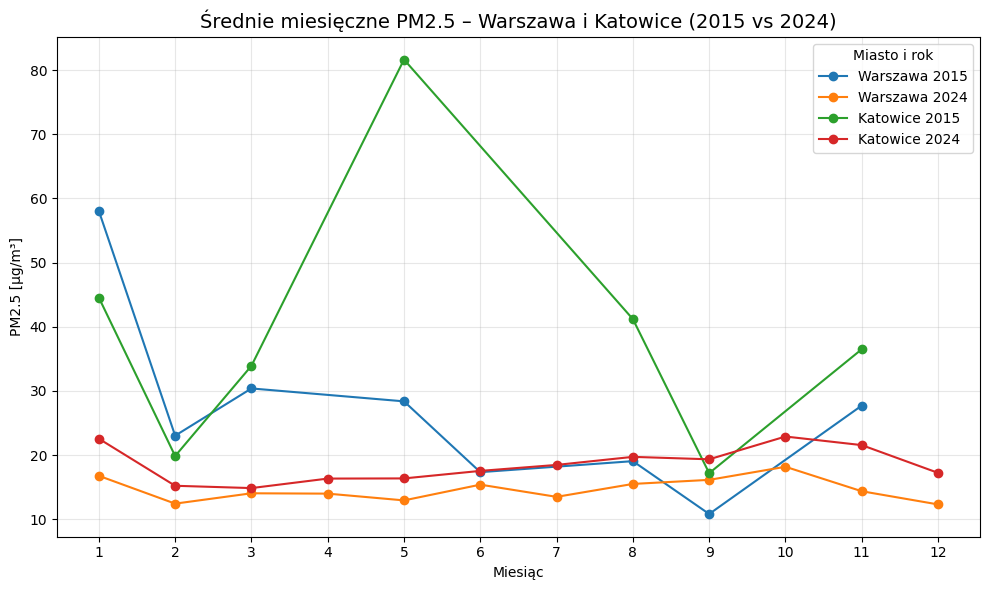

In [5]:
# wykres
from visualizations import plot_city_trends
fig= plot_city_trends(trend_df)
plt.show()

### Obserwacje i interpretacja:
- w 2024 zarówno w Warszawie jak i w Katowicach średnie stężenia PM2.5 są niskie. w każdym miesiącu Katowice mają wyższe wartości od Warszawy. W obu miastach średnio wyższe wartości obserwujemy zimą.
- w 2015 obserwujemy wysokie stężenia PM2.5. Wartości z Katowic są wyższe od Warszawy.

Porównanie lat 2015 i 2024 wskazuje na **wyraźną poprawę jakości powietrza**.
W obu miastach średnie miesięczne stężenia PM2.5 zmalały, co sugeruje skuteczność działań ograniczających emisję zanieczyszczeń. 
Mimo poprawy, **Katowice nadal są bardziej zanieczyszczone niż Warszawa**.

## 3. Heatmapa miesięcznych średnich

Lata w df_ex3: [2015, 2018, 2021, 2024]
Zakres PM2.5: 3.7 - 206.839


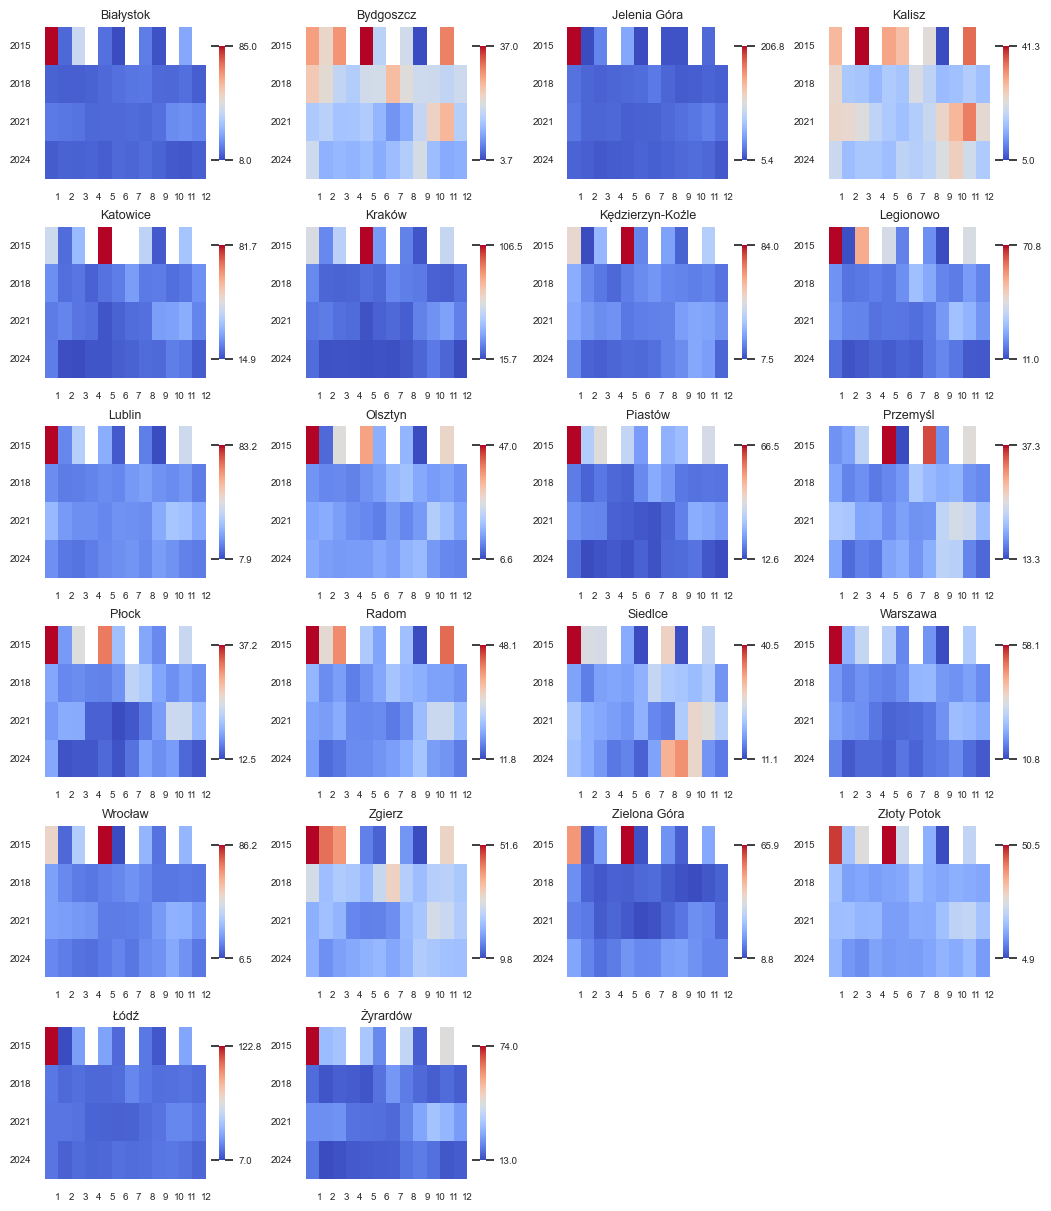

In [6]:
from means import prepare_ex3_heatmap_df, heatmap_sanity_summary

df_ex3 = prepare_ex3_heatmap_df(monthly_PM25)
summary3 = heatmap_sanity_summary(df_ex3)
cities_ex3 = sorted(df_ex3["city"].unique())

print("Lata w df_ex3:", summary3["years_present"])
print("Zakres PM2.5:", summary3["pm25_min"], "-", summary3["pm25_max"])

from visualizations import plot_city_heatmaps
fig = plot_city_heatmaps(df_ex3, cities=cities_ex3)
plt.show()

### Obserwacje:
- W 2015 roku dane są niepełne, ale we wszystkich miastach wartości stężenia PM2.5 są najwyższe.
- W 2018 roku widać już wyraźną poprawę w każdym mieście.
- Najmniejsze stężenia PM2.5 obserwujemy w latach 2021 i 2024. W większości miast w 2024 stężenia są najniższe, wyjątkiem są Siedlce Zielona Góra i Zgierz.
  
Heatmapy pokazują poprawę jakości powietrza.

## 4. Dni z przekroczeniem normy (WHO)

In [7]:
from utils import plot_exceeded_days_top_bottom

plot_exceeded_days_top_bottom(
    df_ex4,
    year=2024,
    top_n=3
)

### Dni z przekroczeniem normy PM2.5 według stacji i roku

Wykres przedstawia liczbę dni, w których stężenie PM2.5 przekroczyło normy WHO, w wybranych stacjach pomiarowych w latach 2015, 2018, 2021 i 2024.  

- **Oś X**: rok pomiaru.  
- **Oś Y**: liczba dni z przekroczeniem normy.  
- **Kolory słupków**: różne stacje pomiarowe (legendy po prawej stronie wykresu).  
- Wykres pokazuje zarówno stacje z największą, jak i najmniejszą liczbą przekroczeń w roku 2024.  

Analiza wizualna:
- Widać wyraźny wzrost liczby dni przekroczeń w latach 2018 i 2021 w większości stacji.  
- W 2024 roku liczba przekroczeń zmalała w porównaniu do 2021.  
- Poszczególne stacje różnią się znacząco pod względem zanieczyszczenia powietrza.



# Średnie dzienne stężenie PM2.5  grupując dane po województwach

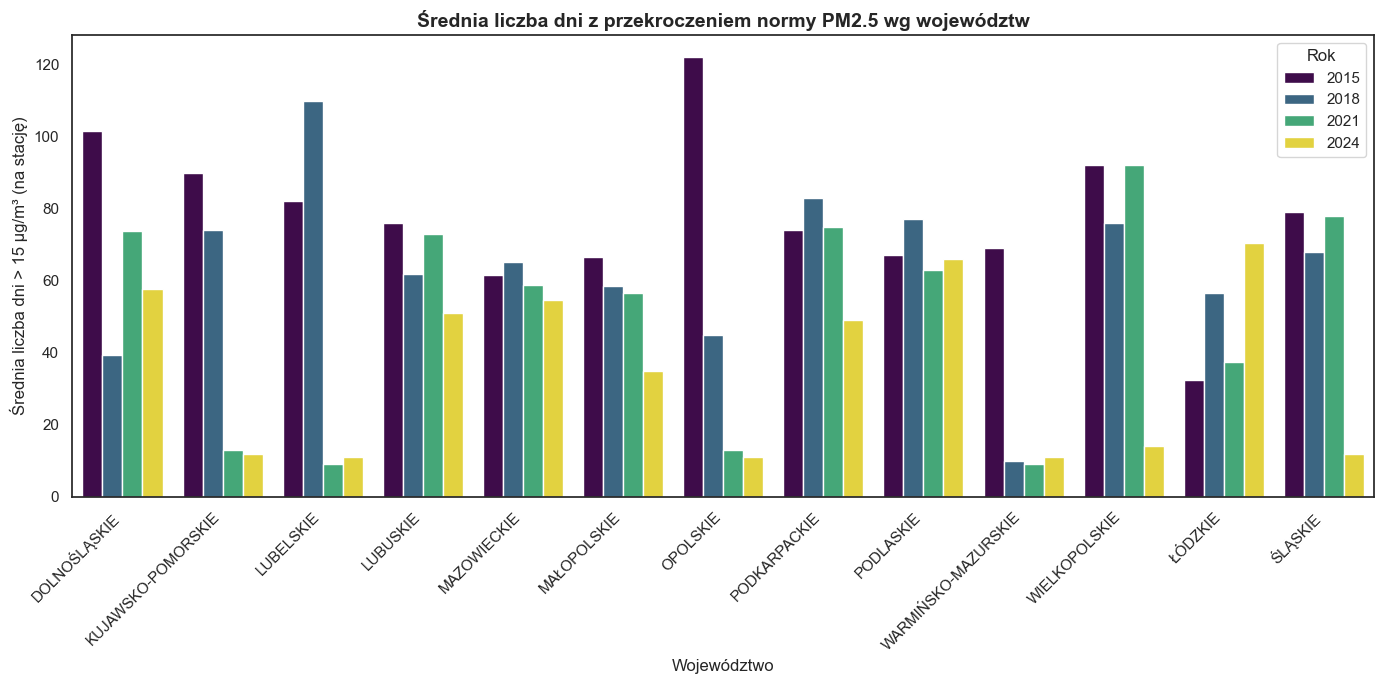

In [8]:
from means import prepare_voivodeship_stats
from visualizations import plot_voivodeship_stats

df_ex4_loaded = pd.read_csv("../data/processed/df_ex4.csv")
meta_df_loaded = pd.read_excel("../data/raw/Metadata.xlsx")


voivodeship_stats = prepare_voivodeship_stats(df_ex4_loaded, meta_df_loaded)

fig = plot_voivodeship_stats(voivodeship_stats)
plt.show()